# 2021 World Happiness EDA

Data from : https://www.kaggle.com/ajaypalsinghlo/world-happiness-report-2021?select=world-happiness-report-2021.csv

In [1]:
# Packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
happy = pd.read_csv('C:/Users/HP/Desktop/work_on_PG/happy2021.csv')
happy.head(5)

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


## EDA에 사용할 주요 변수에 대한 설명
- Country Name : 국가명
- Regional indicator : 지역 분류
- Ladder score : 종합적 행복지수
- Logged GDP per capita : 국가별 GDP의 Log값
- Social support : 어려움이 생겼을 때 친구나 친척의 도움을 받을 수 있는지에 대한 대답 
  0 또는 1로 대답하여, 값의 범위는 0에서 1 사이이다.
- Healthy life expectancy : WHO 출처의 건강 기대 수명
- Freedom to make life choices : 인생에서 선택에 대한 자유를 누릴수있는지에 대한 대답
  0 또는 1로 대답하여, 값의 범위는 0에서 1 사이이다.
- Generosity : 자선 단체에 돈을 기부하는지에 대한 GDP 기준의 비율, 전 세계 평균과의 비교수치이다.
- Corruption Perception : 국가에 부패가 만연해있는지에 대한 대답

In [3]:
# 데이터 추출
happy = happy.iloc[:,[0, 1, 2, 6, 7, 8, 9, 10, 11]]

## 확인해 볼 가설 및 내용
- 한국은 각 분야별로 어느정도 위치해 있을지 시각화하고 싶다. 주변 주요 국가와 비교하고 싶다.
- 한국이 더 행복해질려면, 상대적으로 어느 부분이 부족할까? 어떻게하면 더 행복한 국가가 될까?
- 지역을 구분하였을 때, 어느 지역이 가장 대체로 행복해 할까?
- 돈을 번다고, 혹은 기부를 많이 한다고 행복할까?
- 선택의 자유가 생기면 행복할까?
- 오래 살수 있으면 행복할까?
- 부패하지 않다는 믿음이 있으면 행복할까?
- 사회적으로 활발하게 지낼 수 있으면 행복할까?

### 행복한 사람들의 공통점?

In [4]:
# 변수들간의 상관관계 확인, 특히 Ladder Score와의 상관성을 파악하고자 한다.
happy.corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


수치형 범수의 최대 최소 등을 파악하고자, describe를 통해 값의 범위를 확인해보자

In [5]:
happy.describe()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450
std,1.073924,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226
min,2.523000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000
25%,4.852000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000
50%,5.534000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000
75%,6.255000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000
max,7.842000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000


조사한 변수들에 대해서 행복 점수. Ladder Score에 얼마나 영향을 줄지, 이를 시각화하고 싶다. 비교를 위해서는 점수를 구간화하여 범주화시키는 것이 효과적이기에, 점수를 우선 범주화하고자 한다. Ladder의 최소값은 2.5, 최대는 7.8 정도이미로 2~3, 3~4, 4~5, 5~6, 6~7, 7~8  6개의 구간을 나누자.
- 7 ~ 8 : A
- 6 ~ 7 : B
- 5 ~ 6 : C
- 4 ~ 5 : D
- 3 ~ 4 : E
- 2 ~ 3 : F

또한, 분석의 편의성을 위해 col name을 간략화 시키려고 한다.

In [6]:
# 이름 바꾸기 전
happy.tail(5)

,Country name,Regional indicator,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [7]:
happy.columns = ['Country','Region','Score','GDP','Social','Lifexp','Freechoice','Generosity','Corruption']

In [8]:
# 이름 바꾼 후
happy.tail(5)

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924


In [9]:
happy.isna().sum()

Country       0
Region        0
Score         0
GDP           0
Social        0
Lifexp        0
Freechoice    0
Generosity    0
Corruption    0
dtype: int64

결측치는 존재하지 않으므로, 그냥 진행해도 무방하다.

In [10]:
happy.dtypes

Country        object
Region         object
Score         float64
GDP           float64
Social        float64
Lifexp        float64
Freechoice    float64
Generosity    float64
Corruption    float64
dtype: object

In [11]:
rank = ['x'] * 149
for i in range(149):
    if happy['Score'][i] >= 7:
        rank[i] = 'A'
    elif happy['Score'][i] >= 6:
        rank[i] = 'B'
    elif happy['Score'][i] >= 5:
        rank[i] = 'C'
    elif happy['Score'][i] >= 4:
        rank[i] = 'D'
    elif happy['Score'][i] >= 3:
        rank[i] = 'E'
    elif happy['Score'][i] >= 2:
        rank[i] = 'F'

In [12]:
happy['rank'] = rank
happy.tail(5)

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,E
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,E
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,E
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,E
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,F


In [13]:
happy['Country'].groupby(by = happy['rank']).count()

rank
A    17
B    35
C    49
D    36
E    11
F     1
Name: Country, dtype: int64

groupby로 확인 결과 마지막 F랭크의 경우, 데이터가 1개로 분류의 의미가 없어 E로 통합시켜도 무방할것이다.

In [14]:
happy['rank'][148] = 'E'
happy.tail(5)

<ipython-input-14-42ea641c2710>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happy['rank'][148] = 'E'


,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
144,Lesotho,Sub-Saharan Africa,3.512,7.926,0.787,48.700,0.715,-0.131,0.915,E
145,Botswana,Sub-Saharan Africa,3.467,9.782,0.784,59.269,0.824,-0.246,0.801,E
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,E
147,Zimbabwe,Sub-Saharan Africa,3.145,7.943,0.750,56.201,0.677,-0.047,0.821,E
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,E


5개의 그룹에 따라 GDP, Social, Lifexp, Freechoice, Generosity, Corruption이 의미있게 차이가 있나 알아보자.

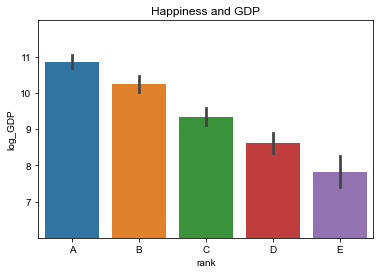

In [15]:
sns.barplot(x = 'rank', y = 'GDP', data = happy)
sns.set_style('darkgrid')
plt.ylim([6, 12])
plt.yticks(np.arange(7,12,1))
plt.ylabel('log_GDP')
plt.title('Happiness and GDP')
plt.show()

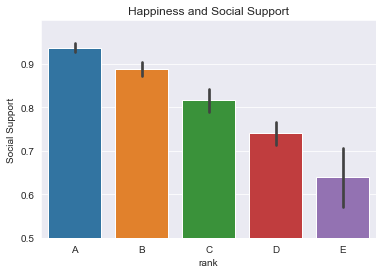

In [16]:
sns.barplot(x = 'rank', y = 'Social', data = happy)
sns.set_style('darkgrid')
plt.ylim([0.5, 1])
plt.yticks(np.arange(0.5, 1, 0.1))
plt.ylabel('Social Support')
plt.title('Happiness and Social Support')
plt.show()

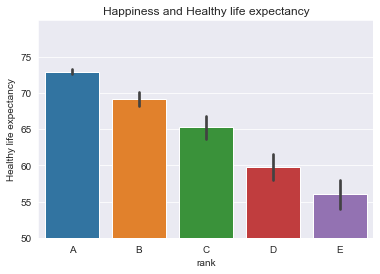

In [17]:
sns.barplot(x = 'rank', y = 'Lifexp', data = happy)
sns.set_style('darkgrid')
plt.ylim([50, 80])
plt.yticks(np.arange(50, 80, 5))
plt.ylabel('Healthy life expectancy')
plt.title('Happiness and Healthy life expectancy')
plt.show()

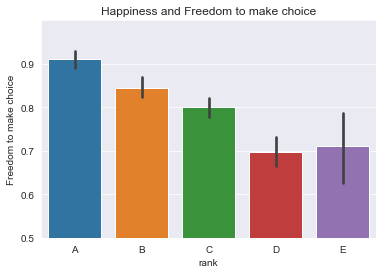

In [18]:
sns.barplot(x = 'rank', y = 'Freechoice', data = happy)
sns.set_style('darkgrid')
plt.ylim([0.5, 1])
plt.yticks(np.arange(0.5, 1, 0.1))
plt.ylabel('Freedom to make choice')
plt.title('Happiness and Freedom to make choice')
plt.show()

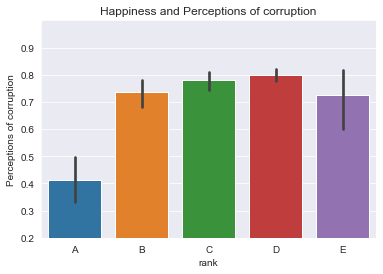

In [19]:
sns.barplot(x = 'rank', y = 'Corruption', data = happy)
sns.set_style('darkgrid')
plt.ylim([0.2, 1])
plt.yticks(np.arange(0.2, 1, 0.1))
plt.ylabel('Perceptions of corruption')
plt.title('Happiness and Perceptions of corruption')
plt.show()

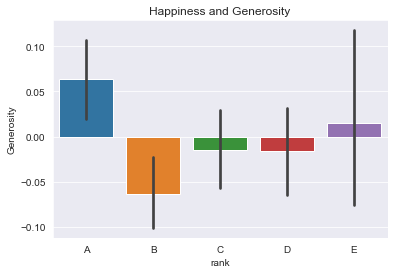

In [20]:
sns.barplot(x = 'rank', y = 'Generosity', data = happy)
sns.set_style('darkgrid')
plt.ylabel('Generosity')
plt.title('Happiness and Generosity')
plt.show()

5개의 그래프를 통해 알 수 있는 사실은 행복도가 더 높은 집단은
- GDP가 높은 경향이 있다.
- 사회적 지지도가 높은 경향이 있다.
- 기대수명이 높은 경향이 있다.
- 국가가 부패하지 않다고 생각하는 경향이 있다.  

그러나, 기부에 관한 지표는 행복도와는 크게 연관이 없음을 알 수 있다.   
심지어 행복도 점수가 가장 낮은 E집단에서는, 기부정도에 대한 편차가 매우 크다.

### 어느 지역의 사람이 가장 행복할까?
두 가지를 확인해 보고 싶다.
-  행복도의 평균이 가장 높은 지역은 어디일까?, 가장 낮은 지역은 어디일까? 어느 국가들이 소속되었을까?
-  행복점수 6점 이상(등급 A, B)인 국가의 소속 지역은 어떤 분포를 가질까?

In [21]:
# 데이터 다시 확인
happy.head(5)

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
0,Finland,Western Europe,7.842,10.775,0.954,72.0,0.949,-0.098,0.186,A
1,Denmark,Western Europe,7.620,10.933,0.954,72.7,0.946,0.030,0.179,A
2,Switzerland,Western Europe,7.571,11.117,0.942,74.4,0.919,0.025,0.292,A
3,Iceland,Western Europe,7.554,10.878,0.983,73.0,0.955,0.160,0.673,A
4,Netherlands,Western Europe,7.464,10.932,0.942,72.4,0.913,0.175,0.338,A


In [22]:
happy['Score'].groupby(by = happy['Region']).mean()

Region
Central and Eastern Europe            5.984765
Commonwealth of Independent States    5.467000
East Asia                             5.810333
Latin America and Caribbean           5.908050
Middle East and North Africa          5.219765
North America and ANZ                 7.128500
South Asia                            4.441857
Southeast Asia                        5.407556
Sub-Saharan Africa                    4.494472
Western Europe                        6.914905
Name: Score, dtype: float64

가장 불행한 지역으로 나온 남아시아와, 가장 행복한 지역으로 나온 북아메리카 및 ANZ 지역의 국가를 확인해보자

In [23]:
happy.loc[happy['Region'] == 'South Asia','Country']

86           Nepal
88        Maldives
100     Bangladesh
104       Pakistan
128      Sri Lanka
138          India
148    Afghanistan
Name: Country, dtype: object

In [24]:
happy.loc[happy['Region'] == 'North America and ANZ','Country']

8       New Zealand
10        Australia
13           Canada
18    United States
Name: Country, dtype: object

그러면 행복도 6점으로, 비교적 행복도 점수가 높은 국가들은 주로 어느 지역권에 분포해있는지 확인해보자.

In [25]:
happy2 = happy.copy()
happy2 = happy2.loc[(happy2['rank'] == 'A') | (happy2['rank'] == 'B'),:]

In [26]:
data = happy2['Region'].groupby(by = happy2['Region']).count()

In [38]:
data.sort_values(ascending = False, inplace = True)

이를 시각화하면 다음과 같다.

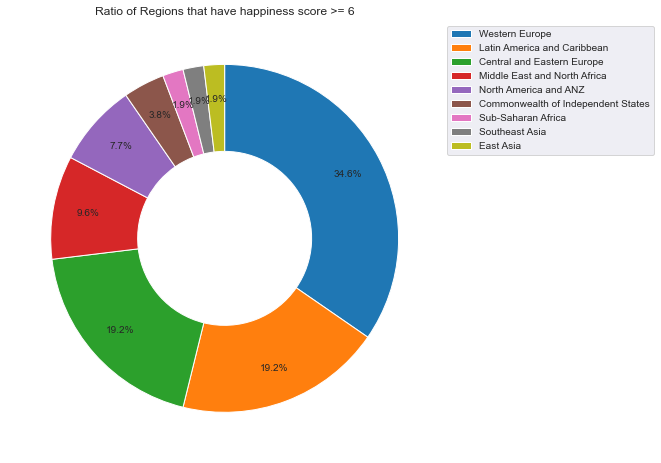

In [43]:
#Using matplotlib piechart to shown be donut
pie, ax = plt.subplots(figsize=[8,8])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", 
        pctdistance=0.8, 
        wedgeprops=dict(width=0.5), 
        startangle = 90,
        counterclock = False)
plt.legend(labels, bbox_to_anchor=(1.0, 1.0)) # 범례가 안겹치게 하기 위해 anchor 사용.
plt.title('Ratio of Regions that have happiness score >= 6')
plt.show()

왠지 다른나라에 가서 살게 된다면, 서유럽에 가고 싶게 생긴 그래프이다.  
위에 해당하는 서유럽 국가와 1.9% 밖에 안되지만 East Asia는 어느 국기인지 알아보자.

In [46]:
happy2.loc[happy2['Region'] == 'Western Europe','Country']

0            Finland
1            Denmark
2        Switzerland
3            Iceland
4        Netherlands
5             Norway
6             Sweden
7         Luxembourg
9            Austria
12           Germany
14           Ireland
16    United Kingdom
19           Belgium
20            France
22             Malta
26             Spain
27             Italy
38            Cyprus
Name: Country, dtype: object

In [48]:
happy2.loc[happy2['Region'] == 'East Asia','Country']

23    Taiwan Province of China
Name: Country, dtype: object

### 한국 vs 중국 vs 일본의 비교

우리나라와 중국, 일본의 데이터를 비교해보고 우리나라가 주변 국가에 비해서는 행복한지, 어느 부분을 개선할 수 있을지 궁금하다.

In [55]:
happy3 = happy.copy()

In [99]:
data = happy3.loc[(happy3['Country'] == 'South Korea') | (happy3['Country'] == 'China') | (happy3['Country'] == 'Japan'),:]

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
55,Japan,East Asia,5.940,10.611,0.884,75.100,0.796,-0.258,0.638,C
61,South Korea,East Asia,5.845,10.651,0.799,73.900,0.672,-0.083,0.727,C
83,China,East Asia,5.339,9.673,0.811,69.593,0.904,-0.146,0.755,C


원하는 형태의 그래프는 x축에 Social, Freechoice, Corrpution이 들어가고 각 국가별로 값을 비교하는 방식이다.
따라서 data frame을 재정의하자.

In [113]:
data = np.array([[0.884, 0.799, 0.811],
                [0.796, 0.672, 0.904],
                [0.638, 0.727, 0.755]])
columns = ["Japan", "South Korea", "China"]
index = ["Social", "Freechoice","Corruption"]
df = pd.DataFrame(data = data, index = index, columns = columns)
df

,Japan,South Korea,China
Social,0.884,0.799,0.811
Freechoice,0.796,0.672,0.904
Corruption,0.638,0.727,0.755


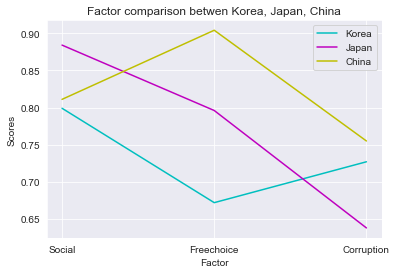

In [120]:
sns.lineplot(data=df, x=df.index, y="South Korea", label = "Korea", color = 'c')
sns.lineplot(data=df, x=df.index, y="Japan", label = "Japan", color = 'm')
sns.lineplot(data=df, x=df.index, y="China", label = "China", color = 'y')
plt.xlabel("Factor")
plt.ylabel("Scores")
plt.title("Factor comparison betwen Korea, Japan, China")
plt.show()

한중일을 비교했을때, 한국의 경우는 Social Support나 Freedom to make choice는 가장 낮으나, 부패도의 경우에 한해서는 중국보다 좋은 점수를 가지고 있다. 부패도는 높을수록 좋지 않다.

### 한국의 위치는 어느정도인가?

이를 위해서는, 한국만 강조해줄 새로운 palette를 별도로 생성해야 한다.

In [89]:
def set_custom_palette(series, kor_color = 'crimson', other_color = 'gray'):
    pal = []
    for country in series:
        if country == 'South Korea':
            pal.append(kor_color)
        else:
            pal.append(other_color)
    return pal

한국은 주요 변수에 대해서 어느 정도 위치하고 있는지 알아보고자 한다.

#### 한국의 gpd 위치 시각화

In [86]:
happy_gdp = happy.sort_values(by=['GDP'],ascending = False)
happy_gdp

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
7,Luxembourg,Western Europe,7.324,11.647,0.908,72.600,0.907,-0.034,0.386,A
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,B
14,Ireland,Western Europe,7.085,11.342,0.947,72.400,0.879,0.077,0.363,A
2,Switzerland,Western Europe,7.571,11.117,0.942,74.400,0.919,0.025,0.292,A
24,United Arab Emirates,Middle East and North Africa,6.561,11.085,0.844,67.333,0.932,0.074,0.589,B
...,...,...,...,...,...,...,...,...,...,...
119,Liberia,Sub-Saharan Africa,4.625,7.288,0.720,56.498,0.735,0.050,0.850,D
114,Mozambique,Sub-Saharan Africa,4.794,7.158,0.744,54.706,0.882,0.061,0.684,D
95,Niger,Sub-Saharan Africa,5.074,7.098,0.641,53.780,0.806,0.018,0.693,C
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729,E


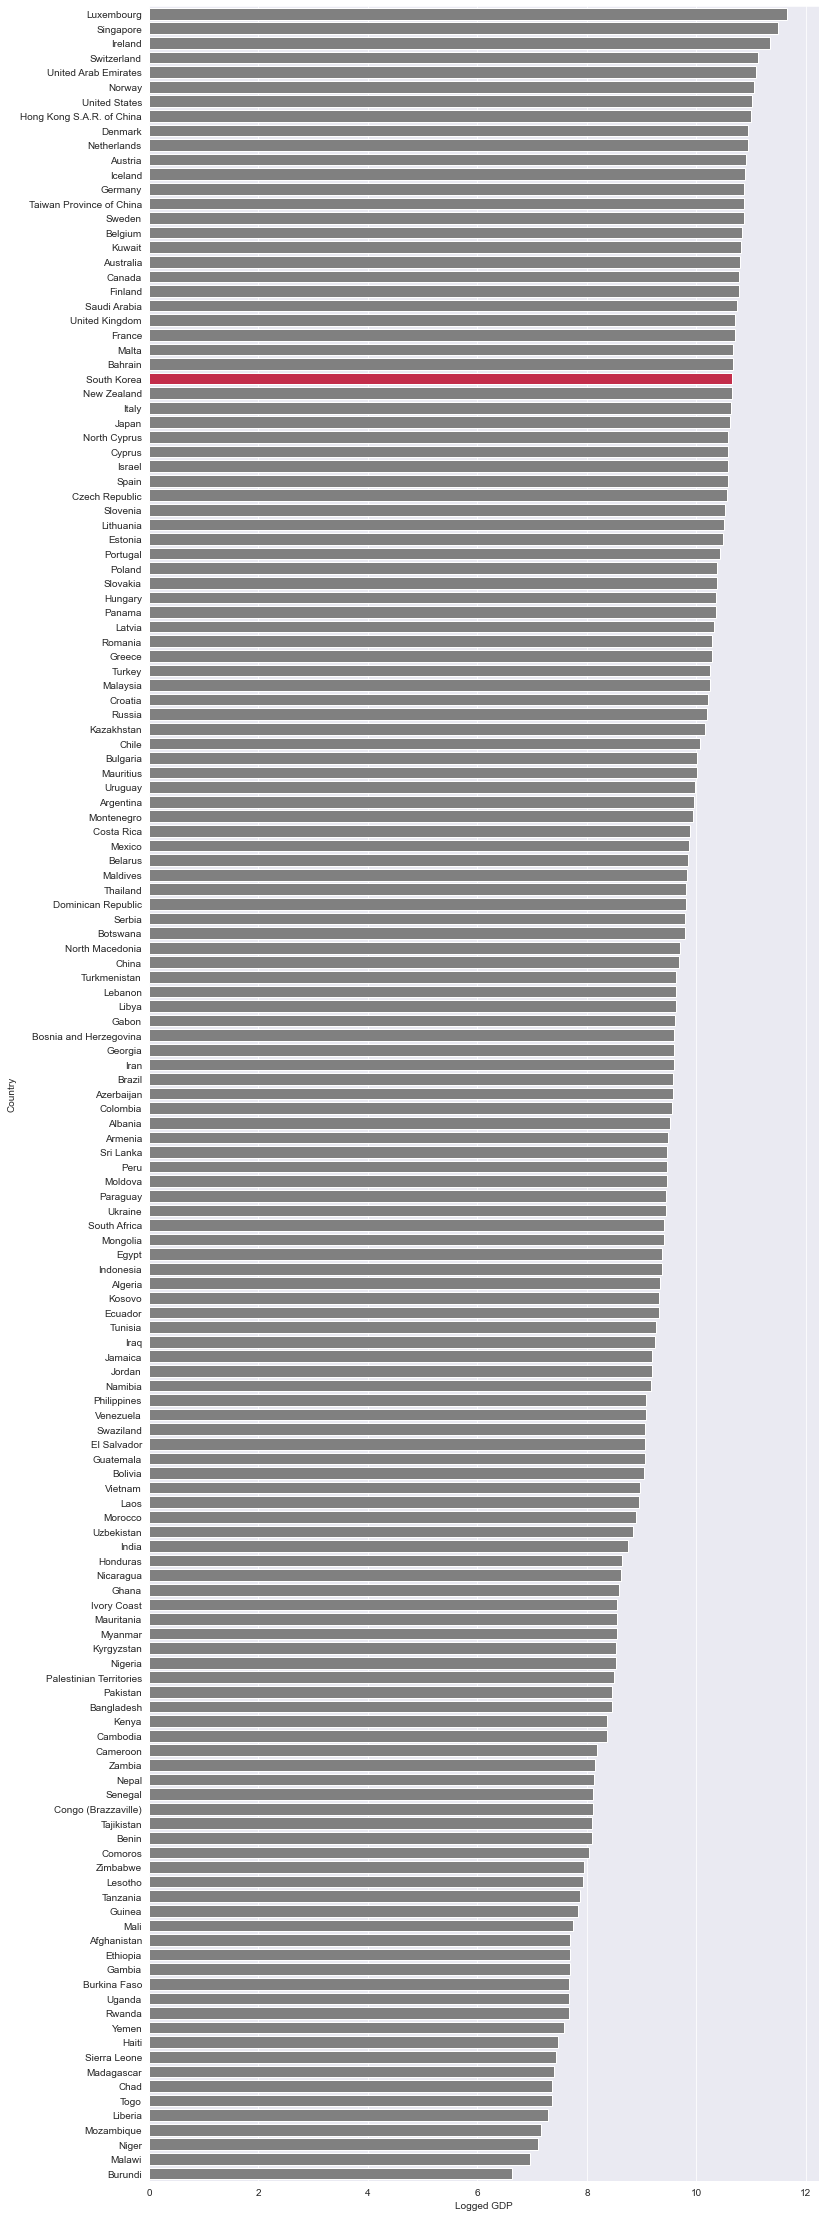

In [85]:
plt.figure(figsize=(12,40))
palette = set_custom_palette(happy_gdp['Country'])
sns.set_palette(palette)
sns.barplot(x='GDP', y='Country', data=happy_gdp)
plt.xlabel('Logged GDP')
plt.show()

중상위권 정도로 준수하다.

#### 한국의 Social Support 정도

In [87]:
happy_soc = happy.sort_values(by=['Social'],ascending = False)
happy_soc

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,A
96,Turkmenistan,Commonwealth of Independent States,5.066,9.629,0.983,62.409,0.877,0.273,0.888,C
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,A
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,A
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,A
...,...,...,...,...,...,...,...,...,...,...
142,Haiti,Latin America and Caribbean,3.615,7.477,0.540,55.700,0.593,0.422,0.721,E
143,Malawi,Sub-Saharan Africa,3.600,6.958,0.537,57.948,0.780,0.038,0.729,E
139,Burundi,Sub-Saharan Africa,3.775,6.635,0.490,53.400,0.626,-0.024,0.607,E
98,Benin,Sub-Saharan Africa,5.045,8.087,0.489,54.713,0.757,-0.034,0.661,C


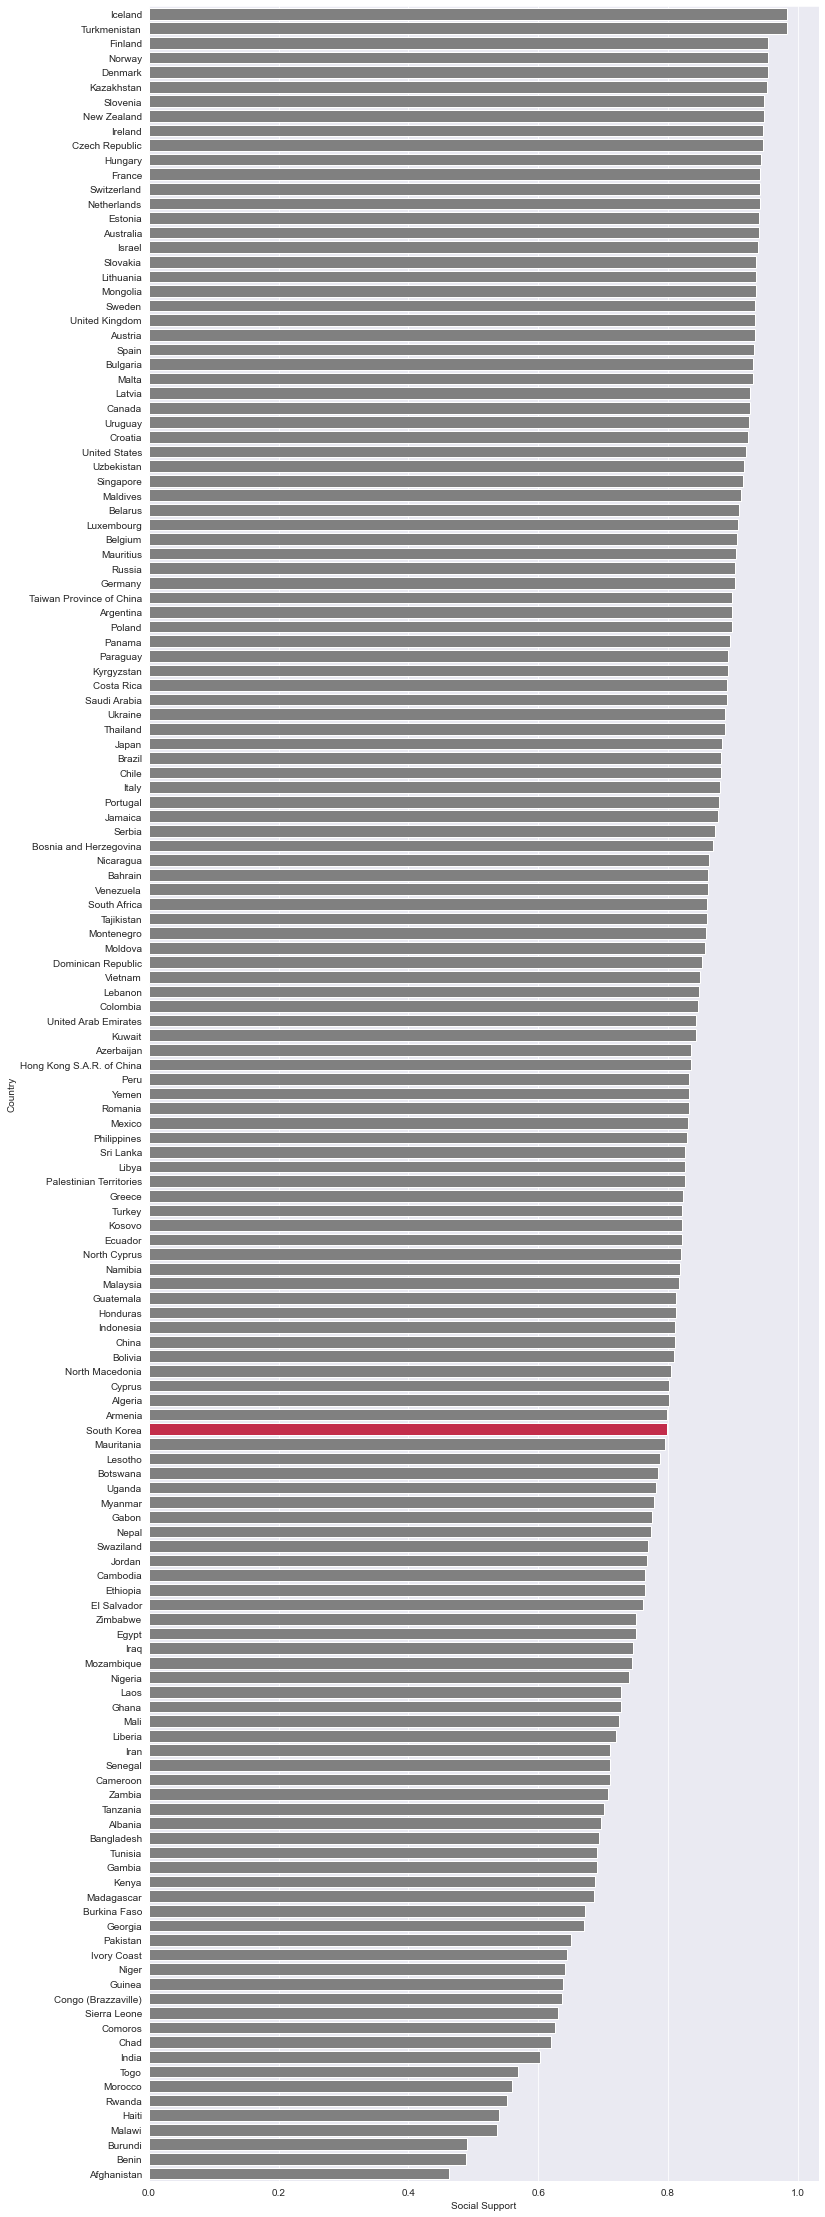

In [91]:
plt.figure(figsize=(12,40))
palette = set_custom_palette(happy_soc['Country'])
sns.set_palette(palette)
sns.barplot(x='Social', y='Country', data=happy_soc)
plt.xlabel('Social Support')
plt.show()

중하위권 정도에 머물러 있는 지표점수이다. 주요 국가들에 비해서도 상당히 낮은 위치에 있음을 알 수 있다.

#### 한국의 Freedom to make choice 정도

In [92]:
happy_free = happy.sort_values(by=['Freechoice'],ascending = False)
happy_free

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
41,Uzbekistan,Commonwealth of Independent States,6.179,8.836,0.918,65.255,0.970,0.311,0.515,B
5,Norway,Western Europe,7.392,11.053,0.954,73.300,0.960,0.093,0.270,A
113,Cambodia,Southeast Asia,4.830,8.360,0.765,62.000,0.959,0.034,0.843,D
3,Iceland,Western Europe,7.554,10.878,0.983,73.000,0.955,0.160,0.673,A
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,A
...,...,...,...,...,...,...,...,...,...,...
134,Madagascar,Sub-Saharan Africa,4.208,7.396,0.686,59.305,0.552,-0.005,0.803,D
130,Comoros,Sub-Saharan Africa,4.289,8.031,0.626,57.349,0.548,0.082,0.781,D
122,Lebanon,Middle East and North Africa,4.584,9.626,0.848,67.355,0.525,-0.073,0.898,D
108,Algeria,Middle East and North Africa,4.887,9.342,0.802,66.005,0.480,-0.067,0.752,D


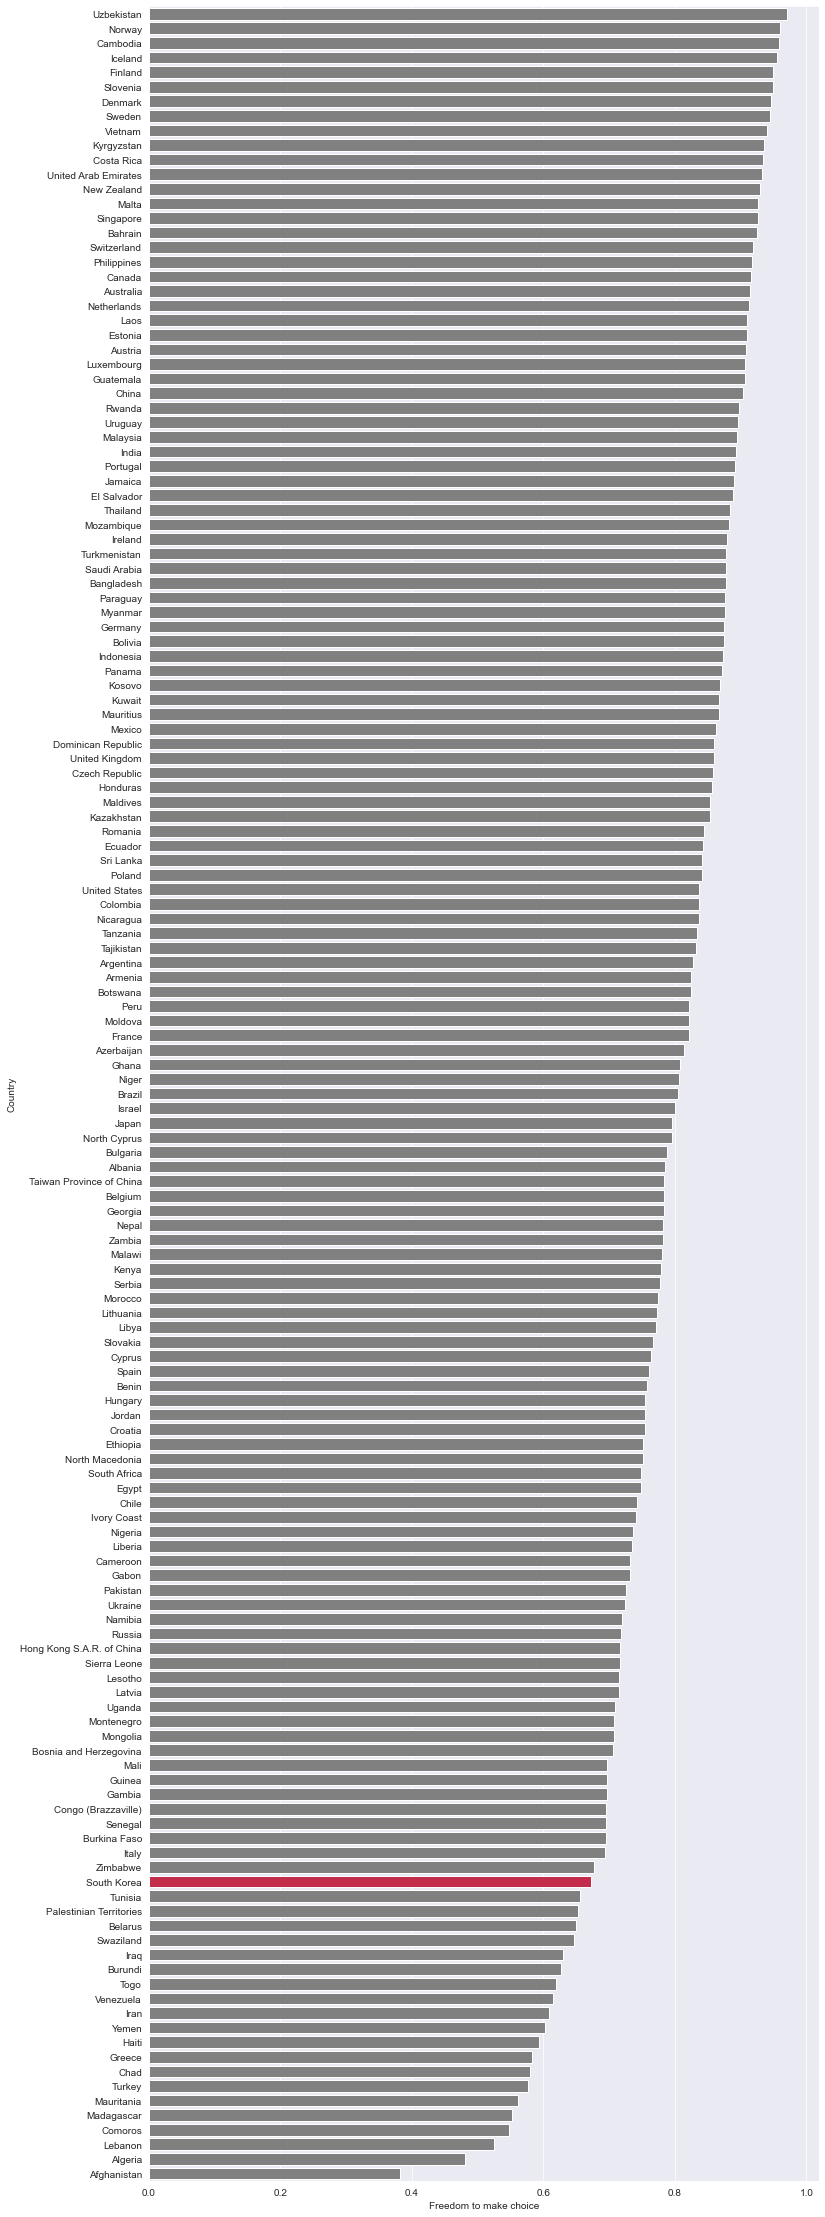

In [95]:
plt.figure(figsize=(12,40))
palette = set_custom_palette(happy_free['Country'])
sns.set_palette(palette)
sns.barplot(x='Freechoice', y='Country', data=happy_free)
plt.xlabel('Freedom to make choice')
plt.show()

헬조선이라는 말이 괜히 나온거 같지는 않다는 느낌이 들 정도로, 다른 나라에 비해 선택에 대한 자유가 없다고 느끼는 비중이 매우 높다.

In [97]:
happy_corp = happy.sort_values(by=['Corruption'],ascending = True)
happy_corp

,Country,Region,Score,GDP,Social,Lifexp,Freechoice,Generosity,Corruption,rank
31,Singapore,Southeast Asia,6.377,11.488,0.915,76.953,0.927,-0.018,0.082,B
146,Rwanda,Sub-Saharan Africa,3.415,7.676,0.552,61.400,0.897,0.061,0.167,E
1,Denmark,Western Europe,7.620,10.933,0.954,72.700,0.946,0.030,0.179,A
0,Finland,Western Europe,7.842,10.775,0.954,72.000,0.949,-0.098,0.186,A
6,Sweden,Western Europe,7.363,10.867,0.934,72.700,0.945,0.086,0.237,A
...,...,...,...,...,...,...,...,...,...,...
148,Afghanistan,South Asia,2.523,7.695,0.463,52.493,0.382,-0.102,0.924,E
63,Bosnia and Herzegovina,Central and Eastern Europe,5.813,9.590,0.870,68.098,0.706,0.113,0.931,C
87,Bulgaria,Central and Eastern Europe,5.266,10.016,0.931,67.000,0.788,-0.096,0.932,C
45,Romania,Central and Eastern Europe,6.140,10.284,0.832,67.355,0.845,-0.219,0.938,B


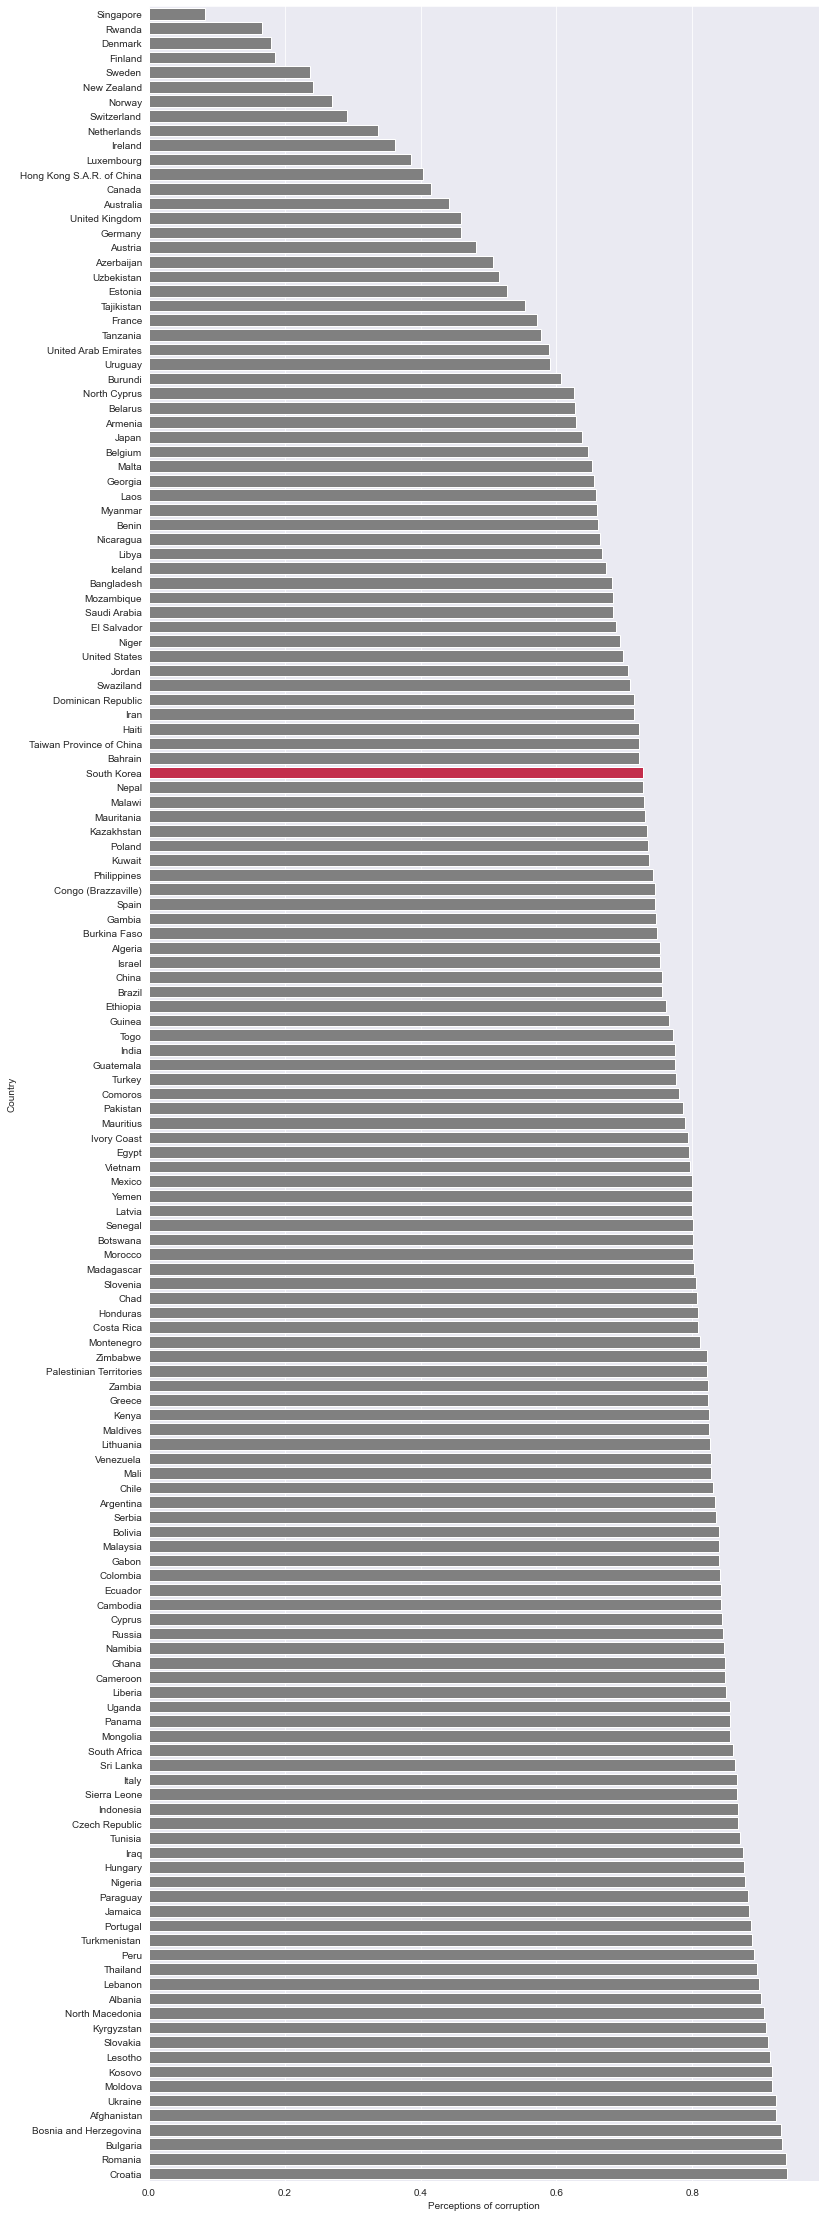

In [98]:
plt.figure(figsize=(12,40))
palette = set_custom_palette(happy_corp['Country'])
sns.set_palette(palette)
sns.barplot(x='Corruption', y='Country', data=happy_corp)
plt.xlabel('Perceptions of corruption')
plt.show()

예상과는 다르게, 부패 만연도에 관련된 지수는 생각보다 다른 국가에 비해서는 그렇게 높은 편은 아니었다.오히려 전체 국가 중에서는 평균권 이상으로 부패에 대해서는 느끼지는 않고 있었다.